<a href="https://colab.research.google.com/github/rezu98/colab/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install nltk
!pip install vaderSentiment
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook, load_workbook
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [67]:
!pip install textstat
from textstat import flesch_kincaid_grade, gunning_fog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00


In [50]:
file_path = 'results.xlsx'

In [ ]:
### Sentiment Intensity Analyzer
# Example text
sample_text = "The Monetary Policy Board of the Bank of Korea decided today to leave the Base Rate unchanged at 3.50% for the intermeeting period. Although inflation is projected to continue its underlying trend of a slowdown, uncertainties regarding the future path of inflation and growth have risen significantly due to a prolongation of restrictive monetary policy stances in major countries and heightened geopolitical risks. In addition, it is forecast that the pace of inflation slowdown will moderate more than previously expected, and it is necessary to monitor household debt growth. The Board, therefore, sees that it is appropriate to maintain its current restrictive policy stance. Regarding the need to raise the Base Rate further, the Board will make a judgement while assessing the changes in domestic and external policy conditions. The currently available information suggests that uncertainties regarding economic and inflationary trends have increased across the global economy, driven by a prolongation of restrictive monetary policy stances in major countries and by the Israel-Hamas conflict. Global economic growth is projected to continue slowing. Inflation in major countries still remains high, though falling gradually, and upside risks have increased due to the rise in global oil prices. In global financial markets, volatility of major price variables has increased with government bond yields rising significantly and with the U.S. dollar strengthening considerably. Looking ahead, the Board sees global economic growth and global financial markets as likely to be affected by the movements of global oil prices and the global inflation slowdown, by monetary policy changes in major countries and their effects, and by developments in the Israel-Hamas conflict. Domestic economic growth has continued to improve at a modest pace owing to the easing of sluggishness in exports, although the recovery in private consumption has been somewhat slow. Labor market conditions have been generally favorable, as both a low unemployment rate and a robust increase in the number of persons employed have continued. Going forward, domestic economic growth is expected to improve gradually with the easing of the sluggishness in exports. GDP growth for the year is expected to be generally consistent with the August forecast of 1.4%. However, uncertainties surrounding the economic outlook are judged to be elevated, affected by heightened geopolitical risks and by the prolongation of restrictive monetary policy stances in major countries. Consumer price inflation has risen from August to 3.7% in September, due to the increase in the price of energy and of agricultural products. However, both core inflation (excluding changes in food and energy prices from the CPI) and short-term inflation expectations among the general public have stayed at 3.3% in September, the same as in August. Looking ahead, it is forecast that consumer price inflation will fall to the lower-3% range at the end of this year and will continue to gradually moderate in 2024. However, upside risks to inflation have increased due to the effects of higher global oil prices and exchange rates, and due to the Israel-Hamas conflict. Accordingly, it is judged that the timing of consumer price inflation converging on the target level is more likely to be delayed than previously expected. Meanwhile, core inflation is also projected to maintain its underlying slowing trend, owing to the weakening of demand-side pressures. However, the pace of the slowdown is likely to be more modest than previously forecast due to the continuing spillover effects of accumulated cost pressure. In financial and foreign exchange markets, volatility has increased as the U.S. Federal Reserve has signaled a prolongation of a high policy rate and as geopolitical risks have expanded. Long-term Korean Treasury bond yields and the Korean won to U.S. dollar exchange rate have risen significantly and stock prices have fallen. Meanwhile, the risks to some non-bank financial sectors have eased. Housing prices have continued their upward trend, especially in Seoul and its surrounding areas. Household loans have continued to increase, mainly driven by housing-related loans. The Board will continue to conduct monetary policy in order to stabilize consumer price inflation at the target level over the medium-term horizon as it monitors economic growth, while paying attention to financial stability. While domestic economic growth is forecast to gradually improve, uncertainties surrounding the policy decision have also risen. The Board, therefore, will maintain a restrictive policy stance for a considerable time with an emphasis on ensuring price stability, while making a judgement regarding the need to raise the Base Rate further. In this process, the Board will thoroughly assess the inflation slowdown, financial stability risks, economic downside risks, monetary policy changes in major countries, household debt growth, and developments in geopolitical risks."
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Perform sentiment analysis
scores = analyzer.polarity_scores(sample_text)
print(scores)

In [15]:
### Sentiment Analyze
### by loughran and mcdonald(2019)

import datetime as dt
import sys
import nltk
nltk.download('punkt')

## loading master dictionary

def load_masterdictionary(file_path, print_flag=False, f_log=None, get_other=False):
    start_local = dt.datetime.now()
    # Setup dictionaries
    _master_dictionary = {}

    # Loop through words and load dictionaries
    with open(file_path, encoding="utf-8") as f:
        _total_documents = 0
        _md_header = f.readline()  # Consume header line
        print()
        for line in f:
            cols = line.rstrip('\n').split(',')
            word = cols[0].upper()  # Convert word to uppercase
            negative_value = int(cols[7])
            positive_value = int(cols[8])
            uncertainty_value = int(cols[9])
            _master_dictionary[word] = {'negative': negative_value, 'positive': positive_value, 'uncertainty': uncertainty_value}

    if print_flag:
        print('\r', end='')  # clear line
        print(f'\nMaster Dictionary loaded from file:\n  {file_path}\n')
        print(f'  master_dictionary has {len(_master_dictionary):,} words.\n')

    if get_other:
        return _master_dictionary, _md_header, _total_documents
    else:
        return _master_dictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
## evaluate sentiment indices

def evaluate_sentiment_indices(text, master_dictionary):
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    words_uppercase = [word.upper() for word in words]  # Convert all words to uppercase
    total_words_count, negative_score, positive_score, uncertain_words_count = 0, 0, 0, 0
    negative_words_count, positive_words_count = 0, 0
    for word in words_uppercase:
        if word in master_dictionary:
            total_words_count += 1  # Increment the total word count
            if master_dictionary[word]['uncertainty'] != 0:
                uncertain_words_count += 1
            if master_dictionary[word]['negative'] > 0:
                negative_words_count += 1
            if master_dictionary[word]['positive'] > 0:
                positive_words_count += 1

    negative_index = negative_words_count / total_words_count  # Calculate the negative index
    positive_index = positive_words_count / total_words_count  # Calculate the positive index
    uncertainty_index = uncertain_words_count / total_words_count  # Calculate the uncertainty index

    return negative_index, positive_index, uncertainty_index, total_words_count, uncertain_words_count, negative_words_count, positive_words_count

if __name__ == '__main__':
    start = dt.datetime.now()
#    print(f'\n\n{start.strftime("%c")}\nPROGRAM NAME: {sys.argv[0]}\n')
    md = r'c.csv'  # Update with your file path
    master_dictionary = load_masterdictionary(md, True)



Master Dictionary loaded from file:
  c.csv

  master_dictionary has 86,531 words.



In [82]:
def evaluate_readability(text):
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    num_sentences = len(sentences)
    num_words = len(words)
    num_syllables = 0
    for word in words:
        num_syllables += textstat.syllable_count(word)
    return textstat.flesch_kincaid_grade(text), textstat.gunning_fog(text)

In [ ]:
# File path for the Excel file
file_path = 'results.xlsx'

In [125]:
# Example FOMC statement to evaluate

date = "2010.10"

fomc_statement = """
   The Monetary Policy Committee of the Bank of Korea decided today to maintain the Base Rate at its current level (2.25%) for the intermeeting period.



In the global economy, emerging market economies have sustained their favorable performance, and the economies of major advanced countries have largely continued their moderate recovery trend, even though the pace of the recovery in the US economy has slowed somewhat. Looking ahead, there exists the possibility of the heightened volatility of economic activity and exchange rates in major countries acting as a risk factor for the global economy.



The underlying upward trend of domestic business activity has been maintained. Even though consumption has faltered, exports have sustained their buoyancy and facilities investment has increased. And, led by the private sector, labor market conditions have shown an improving trend.



The domestic economy is expected to continue on an underlying upward track, even in the presence of external risk.



Consumer price inflation has increased due to a sudden rise in farm product prices, and in the future, upward pressures on the demand side are expected to continue, being associated with the continued upswing in activity. In the real estate market, housing sales prices have continued to decline in Seoul and its surrounding areas, while those in other areas have maintained their increase.








In the financial markets, stock prices have risen, the Korean won has appreciated, and market interest rates have declined in response chiefly to the expanded inflow of foreign portfolio investment funds. The scale of the growth in mortgage lending has widened due to the increase in the numbers of newly occupied apartments, even though house transactions have been inactive.



Looking ahead, the Committee will conduct monetary policy in such a way as to help the economy maintain price stability, while sustaining sound growth under the accommodative policy stance. In carrying out policy, it will take overall account of financial and economic conditions at home and abroad



 """

 ## run!!!

if __name__ == '__main__':
    start = dt.datetime.now()
    md = r'c.csv'  # Update with your file path
    master_dictionary = load_masterdictionary(md, True)

    # Remove unnecessary line breaks and spaces
    processed_text = re.sub(r'\n+', ' ', fomc_statement)  # Replace multiple line breaks with a single space
    processed_text = re.sub(r' +', ' ', processed_text)  # Replace multiple spaces with a single space

    negative_index, positive_index, uncertainty_index, total_words_count, uncertain_words_count, negative_words_count, positive_words_count = evaluate_sentiment_indices(processed_text, master_dictionary)
    flesch_kincaid_grade, gunning_fog_index = evaluate_readability(processed_text)

    print(f"\nNumber of uncertain words: {uncertain_words_count}")
    print(f"Number of negative words: {negative_words_count}")
    print(f"Number of positive words: {positive_words_count}")
    print(f"Number of total words: {total_words_count}")
    print(f"Negative index for the FOMC statement: {negative_index:.2f}")
    print(f"Positive index for the FOMC statement: {positive_index:.2f}")
    print(f"Uncertainty index for the FOMC statement: {uncertainty_index:.2f}")
    print(f"Flesch-Kincaid Grade Level: {flesch_kincaid_grade}")
    print(f"Gunning Fog Index: {gunning_fog_index}")

    # Printing the actual words defined as positive, negative, and uncertainty
    words = nltk.word_tokenize(processed_text)
    words_uppercase = [word.upper() for word in words]  # Convert all words to uppercase
    words_with_sentiment = [(word, master_dictionary[word]) for word in words_uppercase if word in master_dictionary]
    positive_words = [word for word, sentiment in words_with_sentiment if sentiment['positive'] > 0]
    negative_words = [word for word, sentiment in words_with_sentiment if sentiment['negative'] > 0]
    uncertain_words = [word for word, sentiment in words_with_sentiment if sentiment['uncertainty'] > 0]
    print(f"\nPositive words: {positive_words}")
    print(f"Negative words: {negative_words}")
    print(f"Uncertainty words: {uncertain_words}")

# Check if the file already exists, and load it if it does
try:
    workbook = load_workbook(file_path)
    sheet = workbook.active
except FileNotFoundError:
    workbook = Workbook()
    sheet = workbook.active
    sheet.append(['Date', 'FOMC Statement', 'Positive Words', 'Negative Words', 'Uncertainty Words', 'Total Words', 'Positive Words List', 'Negative Words List', 'Uncertainty Words List', 'Flesch-Kincaid Grade Level', 'Gunning Fog Index'])

# Append results to the Excel file
sheet.append([date, processed_text, positive_words_count, negative_words_count, uncertain_words_count, total_words_count, ', '.join(positive_words), ', '.join(negative_words), ', '.join(uncertain_words), flesch_kincaid_grade, gunning_fog_index])

# Save the workbook
workbook.save(file_path)




Master Dictionary loaded from file:
  c.csv

  master_dictionary has 86,531 words.


Number of uncertain words: 6
Number of negative words: 4
Number of positive words: 3
Number of total words: 313
Negative index for the FOMC statement: 0.01
Positive index for the FOMC statement: 0.01
Uncertainty index for the FOMC statement: 0.02
Flesch-Kincaid Grade Level: 13.4
Gunning Fog Index: 14.52

Positive words: ['FAVORABLE', 'IMPROVING', 'STABILITY']
Negative words: ['SLOWED', 'VOLATILITY', 'DECLINE', 'DECLINED']
Uncertainty words: ['SOMEWHAT', 'POSSIBILITY', 'VOLATILITY', 'RISK', 'RISK', 'SUDDEN']




Master Dictionary loaded from file:
  c.csv

  master_dictionary has 86,531 words.


Number of uncertain words: 14
Number of negative words: 17
Number of positive words: 12
Number of total words: 689
Negative index for the FOMC statement: 0.02
Positive index for the FOMC statement: 0.02
Uncertainty index for the FOMC statement: 0.02

Positive words: ['FAVORABLE', 'STRENGTHENED', 'STRENGTHENED', 'FAVORABLE', 'IMPROVING', 'FAVORABLE', 'GREATLY', 'STABILIZE', 'STABILITY', 'IMPROVE', 'STABILITY', 'STABILITY']
Negative words: ['SLOWED', 'SLOW', 'SLOWDOWN', 'WEAKENED', 'SLOWDOWN', 'SLOWDOWN', 'SLUGGISHNESS', 'DECLINE', 'EASING', 'SLUGGISHNESS', 'DECLINE', 'WEAKENED', 'DECLINED', 'SLOWING', 'SLOWING', 'DECLINE', 'SLOWDOWN']
Uncertainty words: ['SUGGESTS', 'SOMEWHAT', 'MAY', 'MAY', 'MAY', 'MAY', 'FLUCTUATE', 'MAY', 'MAY', 'FLUCTUATED', 'RISKS', 'UNCERTAINTIES', 'RISKS', 'RISKS']


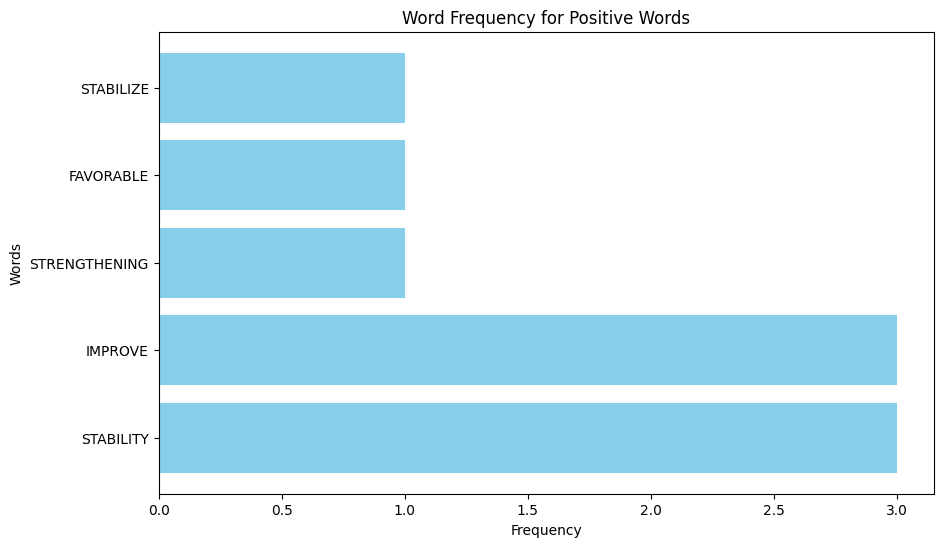

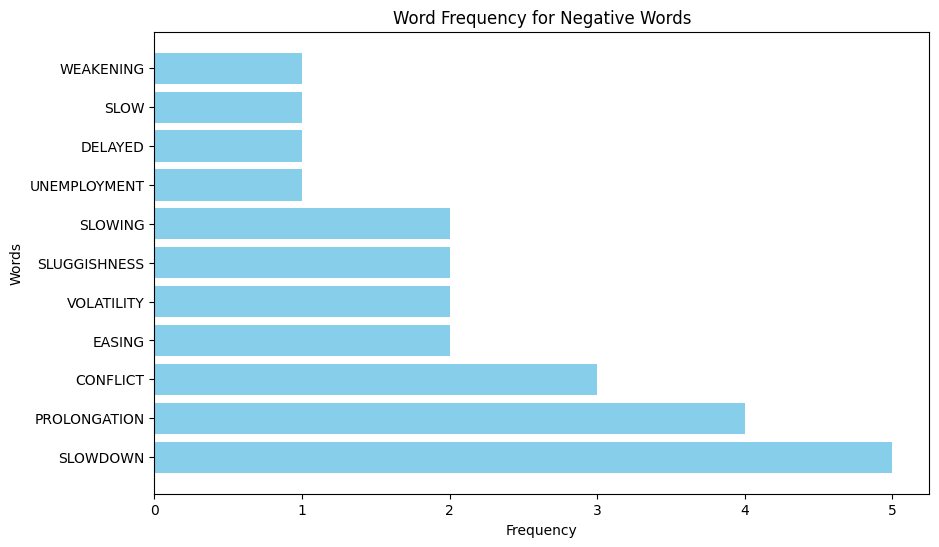

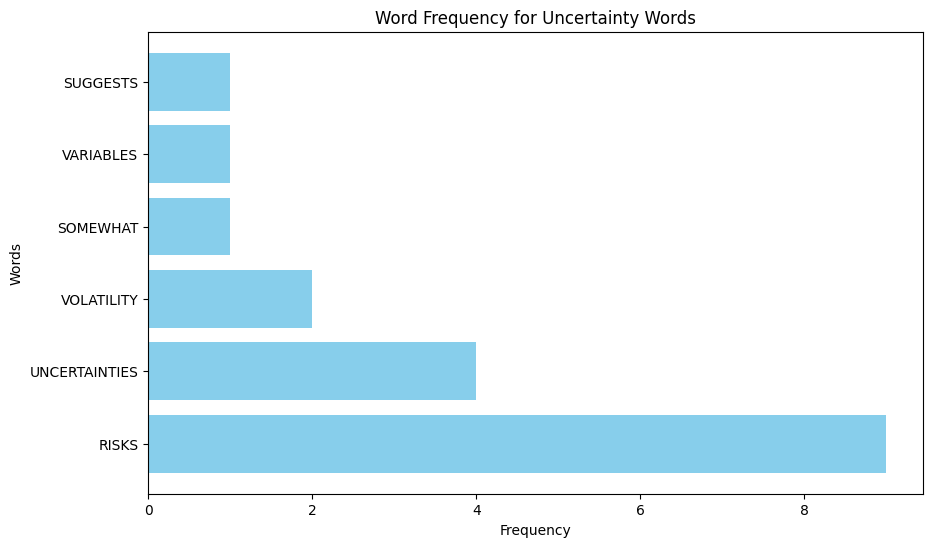

In [41]:
## Visualization of tokenized words by categories

categories = {'Positive': positive_words, 'Negative': negative_words, 'Uncertainty': uncertain_words}
for category, words in categories.items():
    word_counts = {word: words.count(word) for word in set(words)}
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(10, 6))
    plt.barh(list(sorted_word_counts.keys()), list(sorted_word_counts.values()), color='skyblue')
    plt.ylabel('Words')
    plt.xlabel('Frequency')
    plt.title(f'Word Frequency for {category} Words')
    plt.show()

!!! Web crawling of FOMC STATEMENTS

In [35]:
### It doesn't work. Because it may be forbidden in my working network.

from __future__ import print_function
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pickle
import threading
import sys

class FOMC (object):
    '''
    A convenient class for extracting meeting minutes from the FOMC website
    Example Usage:
        fomc = FOMC()
        df = fomc.get_statements()
        fomc.pickle("./df_minutes.pickle")
    '''

    def __init__(self, base_url='https://www.federalreserve.gov',
                 calendar_url='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
                 historical_date = 2011,
                 verbose = True,
                 max_threads = 10):

        self.base_url = base_url
        self.calendar_url = calendar_url
        self.df = None
        self.links = None
        self.dates = None
        self.articles = None
        self.verbose = verbose
        self.HISTORICAL_DATE = historical_date
        self.MAX_THREADS = max_threads


    def _get_links(self, from_year):
        '''
        private function that sets all the links for the FOMC meetings from the giving from_year
        to the current most recent year
        '''
        if self.verbose:
            print("Getting links...")
        self.links = []
        fomc_meetings_socket = urlopen(self.calendar_url)
        soup = BeautifulSoup(fomc_meetings_socket, 'html.parser')

        statements = soup.find_all('a', href=re.compile('^/newsevents/pressreleases/monetary\d{8}a.htm'))
        self.links = [statement.attrs['href'] for statement in statements]

        if from_year <= self.HISTORICAL_DATE:
            for year in range(from_year, self.HISTORICAL_DATE + 1):
                fomc_yearly_url = self.base_url + '/monetarypolicy/fomchistorical' + str(year) + '.htm'
                fomc_yearly_socket = urlopen(fomc_yearly_url)
                soup_yearly = BeautifulSoup(fomc_yearly_socket, 'html.parser')
                statements_historical = soup_yearly.findAll('a', text = 'Statement')
                for statement_historical in statements_historical:
                    self.links.append(statement_historical.attrs['href'])


    def _date_from_link(self, link):
        date = re.findall('[0-9]{8}', link)[0]
        if date[4] == '0':
            date = "{}/{}/{}".format(date[:4], date[5:6], date[6:])
        else:
            date = "{}/{}/{}".format(date[:4], date[4:6], date[6:])
        return date


    def _add_article(self, link, index=None):
        '''
        adds the related article for 1 link into the instance variable
        index is the index in the article to add to. Due to concurrent
        prcessing, we need to make sure the articles are stored in the
        right order
        '''
        if self.verbose:
            sys.stdout.write(".")
            sys.stdout.flush()

        # date of the article content
        self.dates.append(self._date_from_link(link))
        statement_socket = urlopen(self.base_url + link)
        statement = BeautifulSoup(statement_socket, 'html.parser')
        paragraphs = statement.findAll('p')
        self.articles[index]= "\n\n".join([paragraph.get_text().strip() for paragraph in paragraphs])


    def _get_articles_multi_threaded(self):
        '''
        gets all articles using multi-threading
        '''
        if self.verbose:
            print("Getting articles - Multi-threaded...")

        self.dates, self.articles = [], ['']*len(self.links)
        jobs = []
        # initiate and start threads:
        index = 0
        while index < len(self.links):
            if len(jobs) < self.MAX_THREADS:
                t = threading.Thread(target=self._add_article, args=(self.links[index],index,))
                jobs.append(t)
                t.start()
                index += 1
            else:    # wait for threads to complete and join them back into the main thread
                t = jobs.pop(0)
                t.join()
        for t in jobs:
            t.join()

        for row in range(len(self.articles)):
            self.articles[row] = self.articles[row].strip()


    def get_statements(self, from_year=1994):
        '''
        Returns a Pandas DataFrame of meeting minutes with the date as the index
        uses a date range of from_year to the most current

        Input from_year is ignored if it is within the last 5 years as this is meant for
        parsing much older years
        '''
        self._get_links(from_year)
        print("There are", len(self.links), 'statements')
        self._get_articles_multi_threaded()

        self.df = pd.DataFrame(self.articles, index = pd.to_datetime(self.dates)).sort_index()
        self.df.columns = ['statements']
        return self.df


    def pick_df(self, filename="../data/minutes.pickle"):
        if filename:
            if self.verbose:
                print("Writing to", filename)
            with open(filename, "wb") as output_file:
                    pickle.dump(self.df, output_file)

if __name__ == '__main__':
    #Example Usage
    fomc = FOMC()
    df = fomc.get_statements()
    fomc.pickle("./df_minutes.pickle")

Getting links...


HTTPError: ignored

In [ ]:
### web crawling of FOMC statements

!pip install pdfminer.six

In [ ]:
import pdfminer
from pdfminer.high_level import extract_text
import re
import tweepy

from collections import Counter
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:

from FOMC import FOMC
fomc = FOMC()

# get the meeting statements back as a Pandas Dataframe
df = fomc.get_statements()

# write the dataframe as a pickle file
fomc.pickle("./df_minutes.pickle")

In [ ]:
fomc = FOMC(base_url='https://www.federalreserve.gov',
            calendar_url='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            historical_date=2011,
            verbose=True,
            max_threads=10)

In [ ]:
### force delete

import os
import shutil
shutil.rmtree('zipf.png', ignore_errors=True)